In [23]:
import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.stats import kruskal
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


# Question 1

####  Load the NaturalGasStorageUS.csv data and store it in an object named ngas

In [4]:
ngas=pd.read_csv('NaturalGasStorageUS.csv')

#### show its first and last 10 rows

In [5]:
ngas.head(10)

,Week ending,East Region,Midwest Region,Mountain Region,Pacific Region,South Central Region,Salt,NonSalt,Total Lower 48
0,01-Jan-10,769,900,195,268,985,159,826,3117
1,08-Jan-10,703,820,185,257,886,123,763,2850
2,15-Jan-10,642,750,176,246,793,91,702,2607
3,22-Jan-10,616,710,171,235,789,102,687,2521
4,29-Jan-10,582,661,164,221,779,108,671,2406
5,05-Feb-10,523,604,157,211,719,95,624,2214
6,12-Feb-10,471,552,148,197,658,85,573,2026
7,19-Feb-10,425,502,141,193,592,71,521,1853
8,26-Feb-10,390,464,133,184,566,70,496,1738
9,05-Mar-10,349,433,129,182,535,63,472,1627


In [12]:
ngas.tail(10)

,Week ending,East Region,Midwest Region,Mountain Region,Pacific Region,South Central Region,Salt,NonSalt,Total Lower 48
570,04-Dec-20,915,1095,232,312,1294,361,933,3848
571,11-Dec-20,881,1059,223,306,1256,348,908,3726
572,18-Dec-20,844,1015,212,296,1207,337,870,3574
573,25-Dec-20,810,973,204,289,1183,334,849,3460
574,01-Jan-21,765,923,196,282,1163,333,830,3330
575,08-Jan-21,726,879,188,278,1126,327,799,3196
576,15-Jan-21,679,828,176,275,1051,296,755,3009
577,22-Jan-21,641,780,170,275,1014,288,726,2881
578,29-Jan-21,582,719,158,261,970,281,689,2689
579,05-Feb-21,529,666,150,257,915,261,654,2518


#### Write the frequency of data (monthly/yearly)

In [13]:
pd.date_range('2010-01-01', '2021-02-05', freq='D')

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30',
               '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05'],
              dtype='datetime64[ns]', length=4054, freq='D')

#### Print the data types of all columns inside it (Make sure there is one date-time column, which is in the format of python date-time, but not as a string or other format)

In [14]:
ngas.dtypes

Week ending             object
East Region              int64
Midwest Region           int64
Mountain Region          int64
Pacific Region           int64
South Central Region     int64
Salt                     int64
NonSalt                  int64
Total Lower 48           int64
dtype: object

In [15]:
ngas['Week ending']=ngas['Week ending'].astype('datetime64[ns]')
ngas.dtypes

Week ending             datetime64[ns]
East Region                      int64
Midwest Region                   int64
Mountain Region                  int64
Pacific Region                   int64
South Central Region             int64
Salt                             int64
NonSalt                          int64
Total Lower 48                   int64
dtype: object

#### Plot the series with the title " Natural Gas Storage Weekly Data ". Keep figure size (12,4)

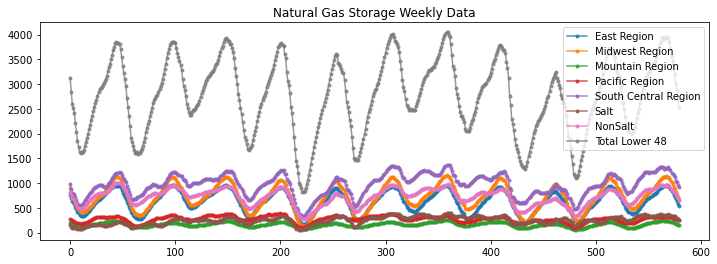

In [6]:
fig, axis = plt.subplots(1,1,figsize=(12,4))
ngas.plot(ax=axis,alpha=0.8,marker='.')
axis.set_title("Natural Gas Storage Weekly Data")
plt.show()

# Question 2

In [16]:
ngas = pd.read_csv("NaturalGasStorageUS.csv", index_col = 0,parse_dates=True).sort_index()
ngas = ngas[['East Region']]
ngas.columns = ['y']
ngas.index.name = 'ts'






In [17]:
ngas


,y
ts,
2010-01-01,769
2010-01-08,703
2010-01-15,642
2010-01-22,616
2010-01-29,582
...,...
2021-01-08,726
2021-01-15,679
2021-01-22,641


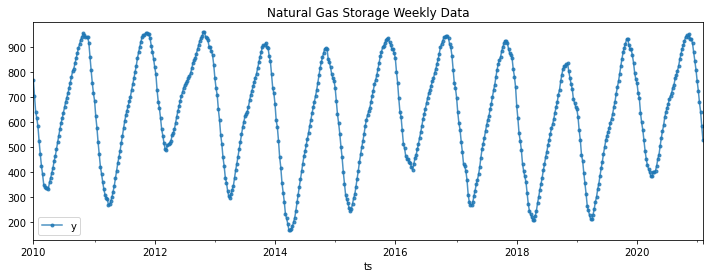

In [18]:
fig, axis = plt.subplots(1,1,figsize=(12,4))
ngas.plot(ax=axis,alpha=0.8,marker='.')
axis.set_title("Natural Gas Storage Weekly Data")
plt.show()



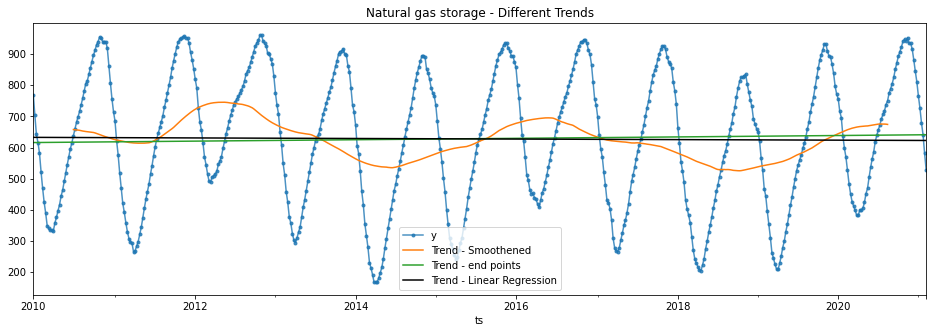

In [19]:
end_points = pd.Series(np.linspace(start=ngas.y[3], stop = ngas.y[-3], num = len(ngas)), index = ngas.index).to_frame().rename(columns = {0:"Trend - end points"})

smoothen = ngas.rolling(52, center=True).mean().rename(columns = {'y':'Trend - Smoothened'})

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(ngas.index.astype(int).values.reshape(-1,1),ngas.y)
LR = pd.Series(model.predict(ngas.index.astype(int).values.reshape(-1,1)), index = ngas.index).to_frame().rename(columns = {0:"Trend - Linear Regression"})

fig, axis = plt.subplots(1,1,figsize=(16,5))
ngas.plot(ax=axis,alpha=0.8, marker='.')
smoothen.plot(ax=axis)
end_points.plot(ax=axis)
LR.plot(ax=axis ,color='black')
axis.set_title("Natural gas storage - Different Trends")
plt.show()



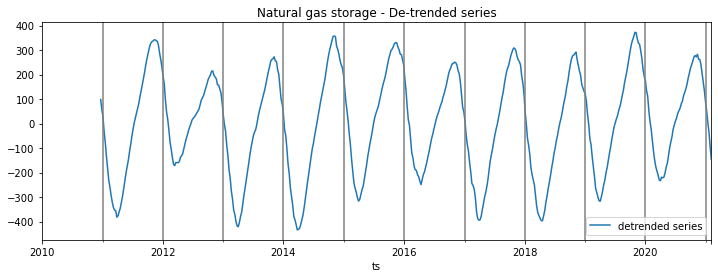

In [20]:
#2.4
fig, axis = plt.subplots(1,1,figsize=(12,4))
(ngas - ngas.rolling(52).mean()).rename(columns = {'y':'detrended series'}).plot(ax=axis)
for year in ['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01']:
    axis.axvline(year, color='gray')
axis.set_title("Natural gas storage - De-trended series")
plt.show()





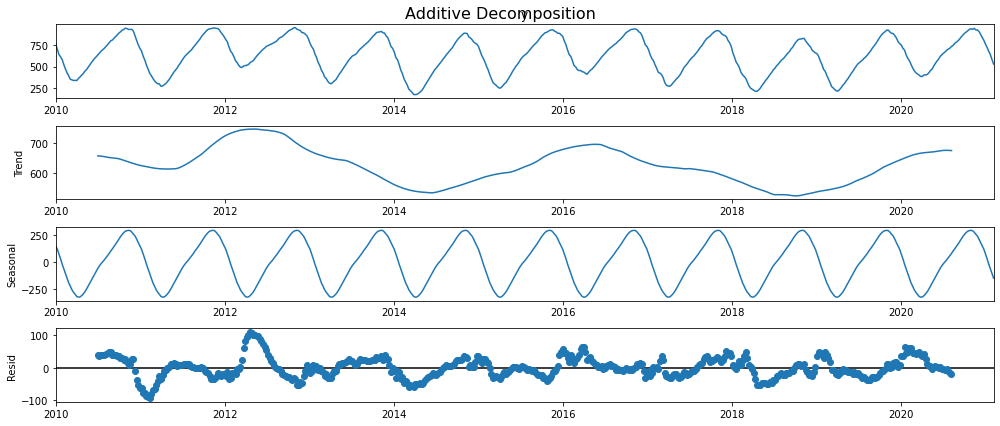

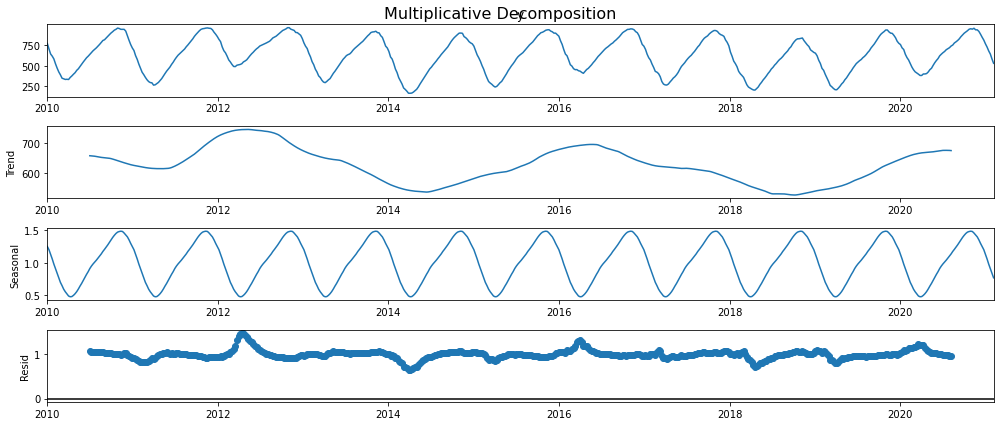

H Statistic:  869.2915461051467
p-value:  4.6515569976789186e-191


In [24]:
#2.5
# Additive Decomposition
additive_decomposition = seasonal_decompose(ngas['y'], model='additive', period=52)

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(ngas['y'], model='multiplicative', period=52)

plt.rcParams.update({'figure.figsize': (14,6)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.show()

multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.show()

H_statistic, p_value = stats.kruskal(ngas.y, np.arange(len(ngas)) % 52)
print("H Statistic: ",H_statistic)
# print("p-value: ",np.round(p_value, 10))
print("p-value: ", p_value)

# Question 3 

#### 1. Load the Henry Hub Natural Gas Spot Price data and store it in an object named henry

In [11]:
henry = pd.read_csv("Henry Hub Natural Gas Spot Price.csv", index_col = 0,parse_dates=True)
henry.columns = ['y']
henry.index.name = 'ts'
henry.iloc[[0,-1],:]

henry.head()

,y
ts,
1997-01-01,3.45
1997-02-01,2.15
1997-03-01,1.89
1997-04-01,2.03
1997-05-01,2.25


#### 2. Plot the series with the title "Henry Hub Natural Gas Spot Price". Keep figure size (12,4)

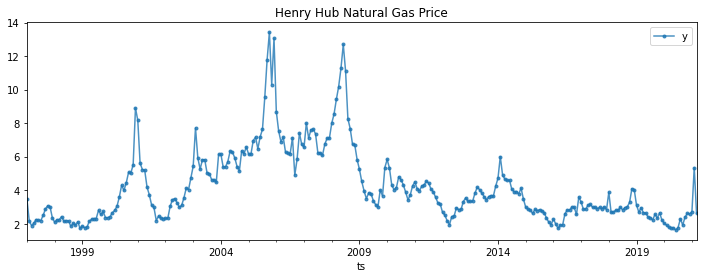

In [12]:
fig, axis = plt.subplots(1,1,figsize=(12,4))
henry.plot(ax=axis,alpha=0.8, marker='.')
axis.set_title("Henry Hub Natural Gas Price")
plt.show()

#### 3. Calculate a moving average (rolling mean) of window 3, 6 and 12. Plot all in one graph with different colours, comment for which window the line is more smoothened.

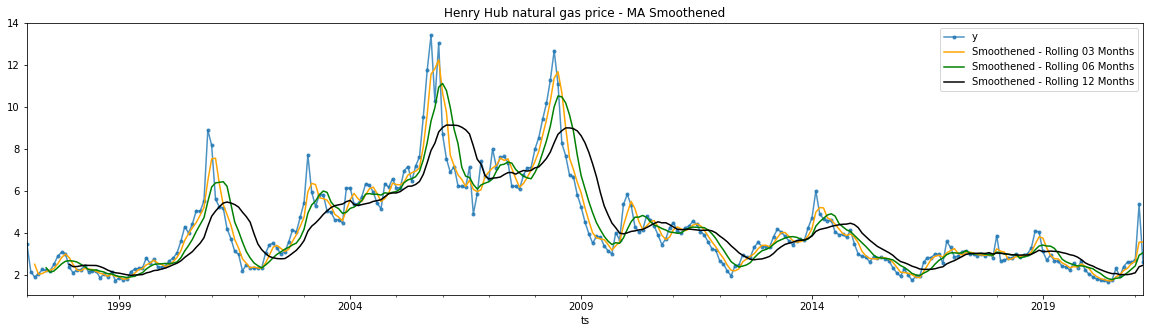

In [13]:
henry['y'][1:7].mean()

smoothen03 = henry.rolling(3,center=False).mean().rename(columns = {'y':'Smoothened - Rolling 03 Months'})
smoothen06 = henry.rolling(6,center=False).mean().rename(columns = {'y':'Smoothened - Rolling 06 Months'})
smoothen12 = henry.rolling(12,center=False).mean().rename(columns = {'y':'Smoothened - Rolling 12 Months'})

fig, axis = plt.subplots(1,1,figsize=(20,5))
henry.plot(ax=axis,alpha=0.8, marker='.')
smoothen03.plot(ax=axis,color='orange')
smoothen06.plot(ax=axis, color='green')
smoothen12.plot(ax=axis,color='black')
axis.set_title("Henry Hub natural gas price - MA Smoothened")
plt.show()


#### Moving Average (Rolling Mean) of window 12 is more smoothened




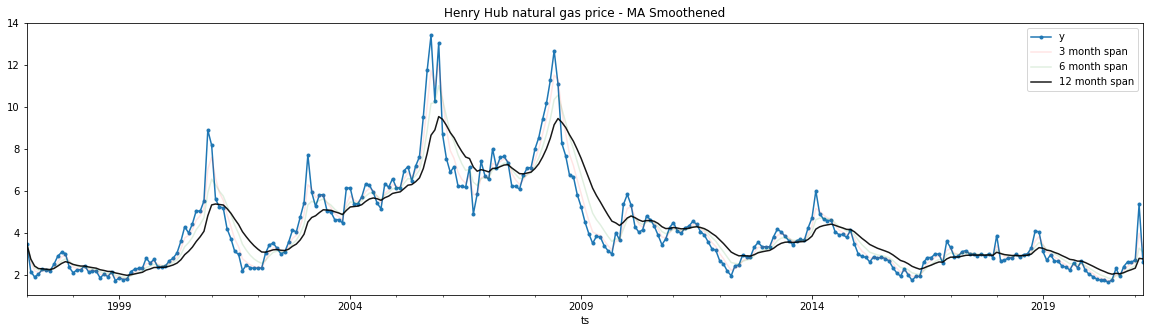

In [14]:
henry.join(henry.ewm(alpha = 0.9).mean().rename(columns = {'y':'Henry_EWM_06'})).head(10)

alpha = 0.9
2.1500*alpha + 3.4500*alpha*(1-alpha)

fig, axis = plt.subplots(1,1,figsize=(20,5))
henry.plot(ax=axis, marker='.')
henry.ewm(span = 3).mean().rename(columns = {'y':'3 month span'}).plot(color='red', label = '3 month span',alpha=0.1,ax=axis)
henry.ewm(span = 6).mean().rename(columns = {'y':'6 month span'}).plot(color='green', label = '6 month span',alpha=0.12,ax=axis)
henry.ewm(span = 12).mean().rename(columns = {'y':'12 month span'}).plot(color='black', label = '12 month span',alpha=0.9,ax=axis)
axis.set_title("Henry Hub natural gas price - MA Smoothened")
plt.legend()
plt.show()

#### Question 4

#### 1. Load the sensor_temp_1D data and store it in an object named sensor_data


In [25]:
sensor_data=pd.read_csv('sensor_temp_1D.csv')

sensor_data.head()

,time_stamp,Crude Inlet Temp
0,2020-03-01,60.095238
1,2020-03-02,60.343367
2,2020-03-03,62.337128
3,2020-03-04,58.455685
4,2020-03-05,58.131580


#### 2. show its first and last 10 rows


In [26]:
sensor_data.head(10)
sensor_data.head(10)

,time_stamp,Crude Inlet Temp
0,2020-03-01,60.095238
1,2020-03-02,60.343367
2,2020-03-03,62.337128
3,2020-03-04,58.455685
4,2020-03-05,58.131580
5,2020-03-06,60.015051
6,2020-03-07,61.356602
7,2020-03-08,62.504021
8,2020-03-09,62.967220
9,2020-03-10,64.996223


#### 3. Write the frequency of data (monthly/yearly, etc)



#### 4. Print the data types of all columns inside it (Make sure there is one date-time column, which is in the format of python date-time, but not as a string or other format. If needed, convert to date time)


In [28]:
sensor_data['time_stamp'] = pd.to_datetime(sensor_data['time_stamp'])
print(sensor_data)

    time_stamp  Crude Inlet Temp
0   2020-03-01         60.095238
1   2020-03-02         60.343367
2   2020-03-03         62.337128
3   2020-03-04         58.455685
4   2020-03-05         58.131580
..         ...               ...
923 2022-09-10         92.305260
924 2022-09-11         90.759560
925 2022-09-12         90.439796
926 2022-09-13         91.247429
927 2022-09-14         91.647682

[928 rows x 2 columns]


In [29]:
sensor_data.dtypes

time_stamp          datetime64[ns]
Crude Inlet Temp           float64
dtype: object

#### 5. Check if there are missing values in the data. If exist, treat them with any of the imputation method from fill-forward or fill-backward or linear interpolation


In [30]:
sensor_data.isnull().sum()

time_stamp           0
Crude Inlet Temp    22
dtype: int64

In [ ]:
mean=sensor_data['Crude Inlet Temp'].mean()

In [ ]:
sensor_data.interpolate(method='linear')
sensor_data.fillna(value=mean,inplace= True)

In [31]:
sensor_data.isnull().sum()

time_stamp           0
Crude Inlet Temp    22
dtype: int64

#### 6. plot the data with figure size mentioned in Q1


In [32]:
sensor_data1=sensor_data.set_index(['time_stamp'])
sensor_data1 = sensor_data1.rename(columns={'Crude Inlet Temp': 'y'})

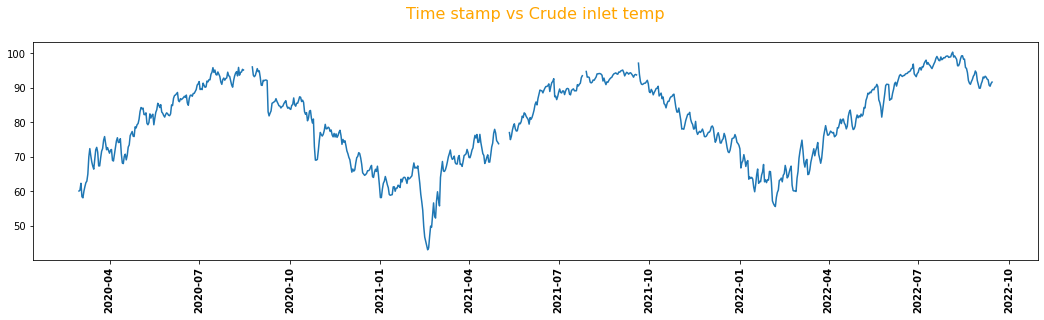

In [33]:
plt.figure(figsize=(18,4))
plt.plot(sensor_data1)
plt.title('Time stamp vs Crude inlet temp\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Orange'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

#### 8. Find the values of p and q from PACF and ACF plots


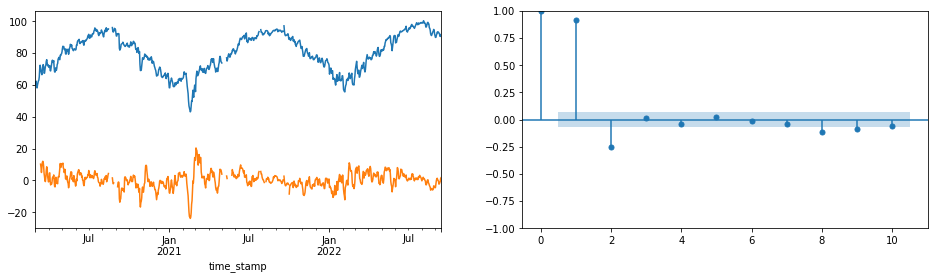

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(sensor_data1, lags = 15) 

fig, axes = plt.subplots(1,2, figsize = (16,4))

sensor_data1.y.plot(ax=axes[0])
sensor_data1.diff(12).y.plot(ax=axes[0])

tsaplots.plot_pacf(sensor_data1.diff(12).dropna(), lags=10, ax=axes[1])
plt.title('')
plt.show()

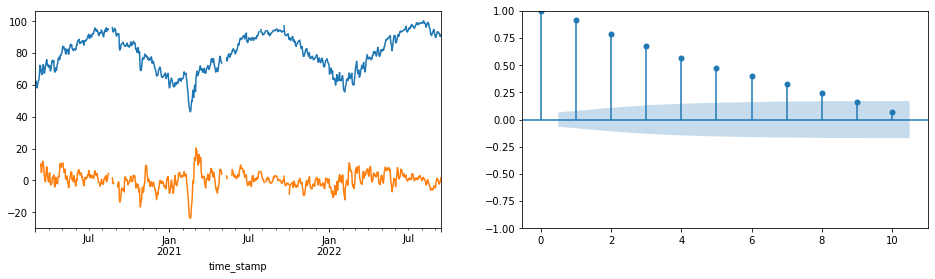

In [36]:
from statsmodels.graphics import tsaplots
fig, axes = plt.subplots(1,2, figsize = (16,4))

sensor_data1.y.plot(ax=axes[0])
sensor_data1.diff(12).y.plot(ax=axes[0])

tsaplots.plot_acf(sensor_data1.diff(12).dropna(), lags=10, ax=axes[1])
#tsaplots.plot_acf(sensor_data1, lags=40, ax=axes[1])
plt.title("")
plt.show()

#### 9. Fit AR, MA, ARMA models. Print model summary, compare AIC


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
# from sklearn.linear_model import LinearRegression
import statsmodels.tsa.api as smt
from statsmodels.graphics import tsaplots
import warnings
warnings.filterwarnings('ignore')


In [38]:
from statsmodels.tsa.arima.model import ARIMA
q=9


In [39]:
MA_model = ARIMA(endog=sensor_data1, order=(0, 0, q)) #  [AR-I-MA] ~ (p, d, q)
results = MA_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  928
Model:                 ARIMA(0, 0, 9)   Log Likelihood               -1822.024
Date:                Fri, 02 Dec 2022   AIC                           3666.048
Time:                        12:17:41   BIC                           3719.211
Sample:                    03-01-2020   HQIC                          3686.327
                         - 09-14-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.3054      0.878     91.456      0.000      78.584      82.026
ma.L1          1.5304      0.031     49.470      0.000       1.470       1.591
ma.L2          1.8217      0.055     33.156      0.0

In [40]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,80.3054,0.878,91.456,0.000,78.584,82.026
ma.L1,1.5304,0.031,49.470,0.000,1.470,1.591
ma.L2,1.8217,0.055,33.156,0.000,1.714,1.929
ma.L3,1.9469,0.076,25.739,0.000,1.799,2.095
ma.L4,1.9475,0.088,22.014,0.000,1.774,2.121
ma.L5,1.7362,0.096,18.072,0.000,1.548,1.925
ma.L6,1.3944,0.091,15.299,0.000,1.216,1.573
ma.L7,1.0124,0.075,13.582,0.000,0.866,1.158
ma.L8,0.6602,0.054,12.289,0.000,0.555,0.766
ma.L9,0.2551,0.031,8.180,0.000,0.194,0.316


In [ ]:
pred = results.predict(start=sensor_data1.index[0], end='2022-09-14', dynamic=False)


In [2]:
from statsmodels.tsa.arima.model import ARIMA